In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('neutral.csv', delimiter=';', encoding='ISO-8859-1')
#df.to_excel('./neutral.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23683 entries, 0 to 23682
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Rs_id                                                         23681 non-null  float64
 1   Contig_Acc_version                                            23671 non-null  object 
 2   ContigPositionStart_0_based                                   23671 non-null  object 
 3   ContigPositionEnd_0_based                                     23671 non-null  object 
 4   GenomeBuild                                                   23671 non-null  object 
 5   mRNA_acc_version                                              23671 non-null  object 
 6   mRNA_start_position_0_based                                   23671 non-null  float64
 7   mRNA_end_position_0_based                                     23671

Очистка и подготовка данных

In [15]:
# Анализ и дроп столбцов, которые не участвуют
columns_to_drop = ['Contig_Acc_version', 'ProteinAccVersion', 'PDB_ID', 'PDB_Chain',
                   'Variant_on_PDB', 'PDB_Resolution',
                   'Entrez_Gene_Id', "HGNC_Gene_Symbol", "Link_to_ gene_entry_at_Entrez",
                   "Link_to_the_RefSeq_protein_sequences_at_NCBI_in_Fasta_Format",
                   "Link_to_the_mRNA_sequences_infasta_format",
                   'Link_to_the_Contig_sequences_in_fasta_format',
                   'Cluster_Number',
                   'HGVS_description_of_protein_variants_with_one_letter_code',
                   'Representative_sequnce_id', "RefProtResidue_Three_letter",
                   "RefProtResidue_One_letter", "MissenseResidue_Three_letter",
                   "mRNA_DNA_variation", "MissenseResidue_One_Letter",
                   "HGVS_description_of_protein_variants "]

df.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
# Очистка от строк с значением ' ' и NaN
if df is not None:
    df.replace(' ', np.nan, inplace=True)
    data = df.dropna()
    print(data.isnull().sum())

Rs_id                                  0
ContigPositionStart_0_based            0
ContigPositionEnd_0_based              0
GenomeBuild                            0
mRNA_acc_version                       0
mRNA_start_position_0_based            0
mRNA_end_position_0_based              0
ReadingFrame_base_position_in_codon    0
MissenseAllele                         0
MissenseCodon                          0
ReferenceAllele                        0
ReferenceCodon                         0
AminoAcidPosition_0_based              0
dtype: int64


In [17]:
# Преобразование в численные типы
numeric_columns = ['ContigPositionStart_0_based', 'ContigPositionEnd_0_based',
                   'mRNA_start_position_0_based', 'mRNA_end_position_0_based',
                   'ReadingFrame_base_position_in_codon', 'AminoAcidPosition_0_based']

for col in numeric_columns:
    # Проверка перед преобразованием
    non_numeric = data[col][~data[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Удаление строк с NaN после преобразования
data.dropna(subset=numeric_columns, inplace=True)

<ipython-input-17-594042653f16>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')
<ipython-input-17-594042653f16>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=numeric_columns, inplace=True)


In [18]:
# Обработка дубликатов
duplicate_rows_data = data[data.duplicated()]
print("Количество повторяющихся строк: ", duplicate_rows_data.shape)

Количество повторяющихся строк:  (0, 13)


In [19]:
# Проверка уникальности данных в столбцах
print(f"Колонка | Кол-во уникальных значений")
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


Колонка | Кол-во уникальных значений
Rs_id: 21133 distinct values
ContigPositionStart_0_based: 22742 distinct values
ContigPositionEnd_0_based: 22742 distinct values
GenomeBuild: 1 distinct values
mRNA_acc_version: 9365 distinct values
mRNA_start_position_0_based: 5384 distinct values
mRNA_end_position_0_based: 5384 distinct values
ReadingFrame_base_position_in_codon: 3 distinct values
MissenseAllele: 4 distinct values
MissenseCodon: 61 distinct values
ReferenceAllele: 4 distinct values
ReferenceCodon: 61 distinct values
AminoAcidPosition_0_based: 2566 distinct values


In [20]:
main_features = ['ContigPositionStart_0_based', 'ContigPositionEnd_0_based',
                 'mRNA_start_position_0_based', 'mRNA_end_position_0_based',
                 'ReadingFrame_base_position_in_codon', 'AminoAcidPosition_0_based']

categorical_features = ['mRNA_acc_version', 'GenomeBuild', 'MissenseAllele',
                'MissenseCodon', 'ReferenceAllele', 'ReferenceCodon']

Rejection 0 points


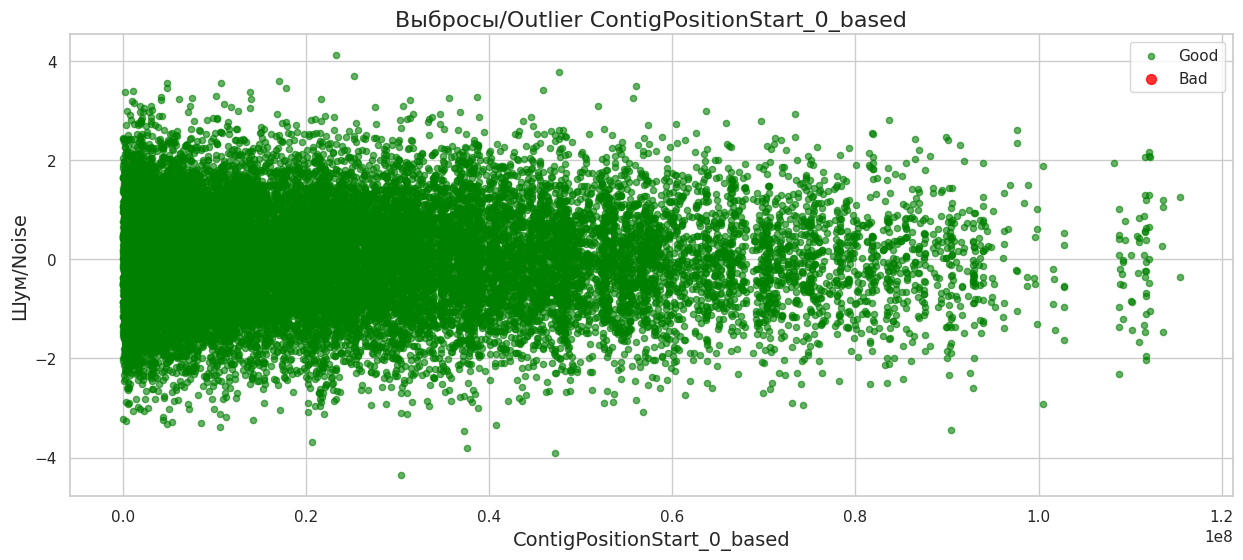

Rejection 0 points


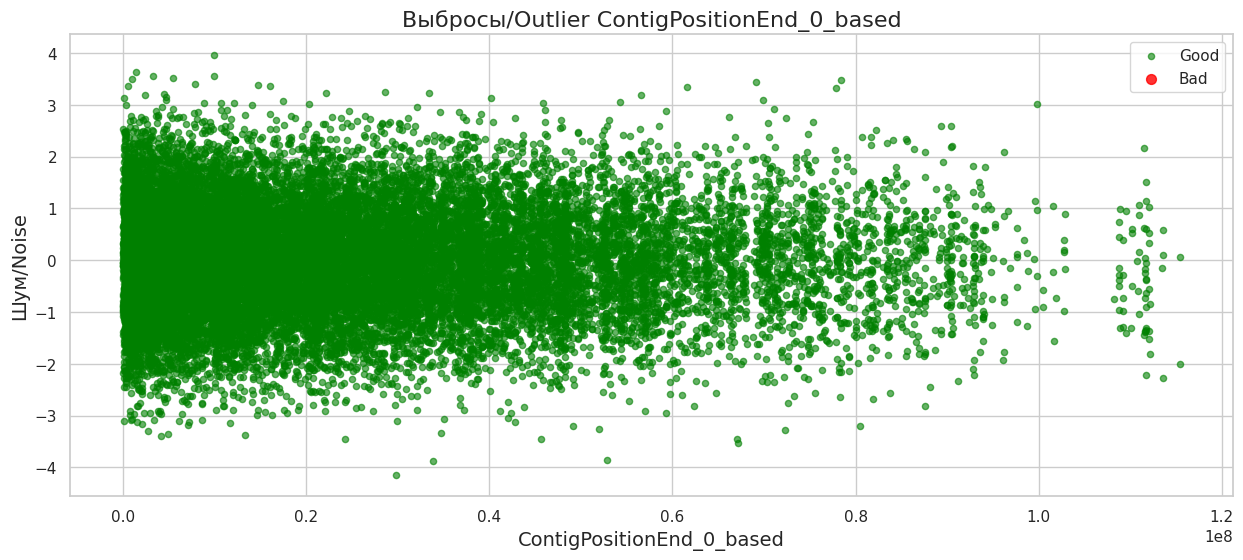

Rejection 149 points


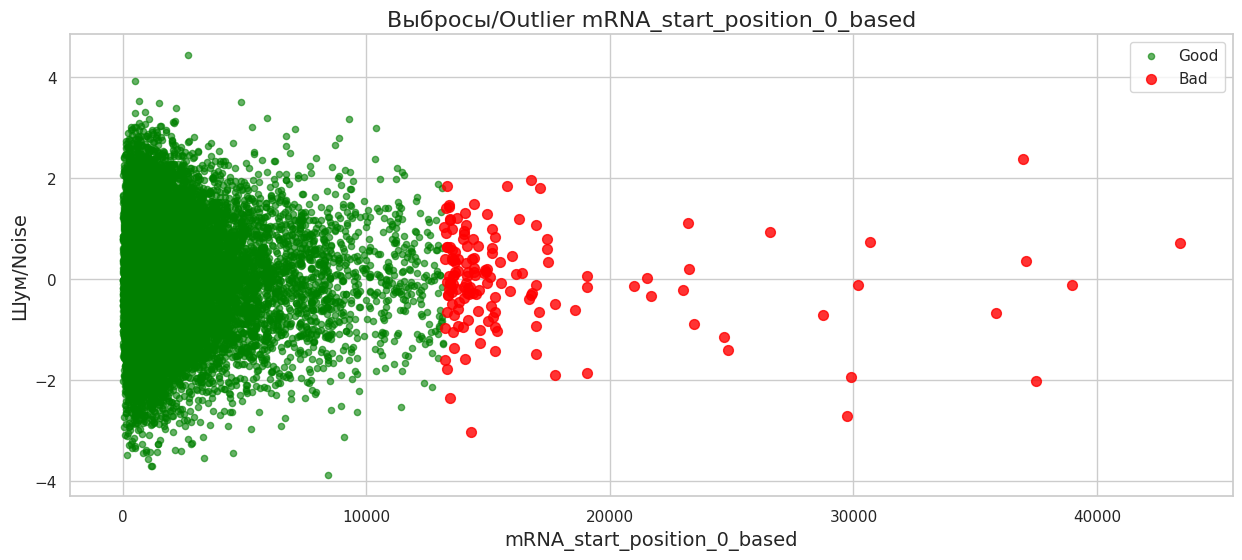

Rejection 149 points


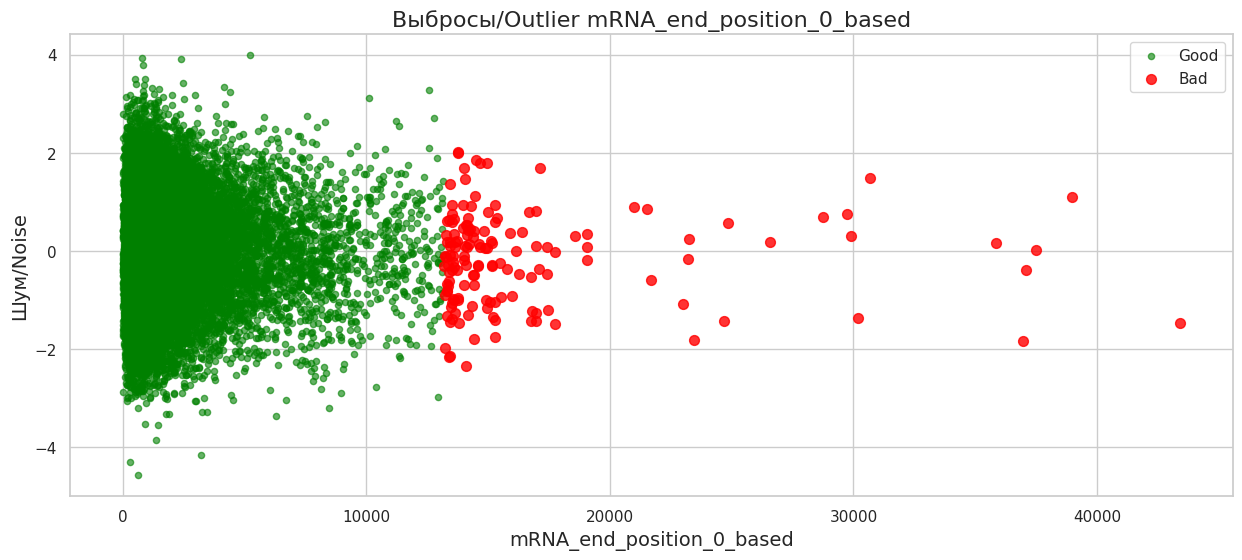

Rejection 0 points


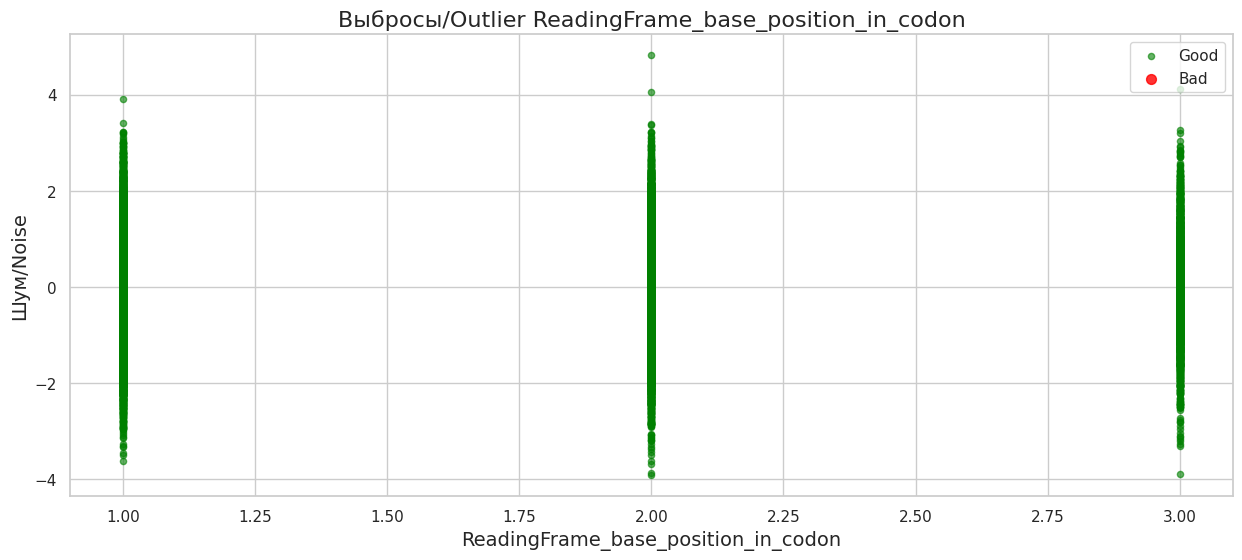

Rejection 162 points


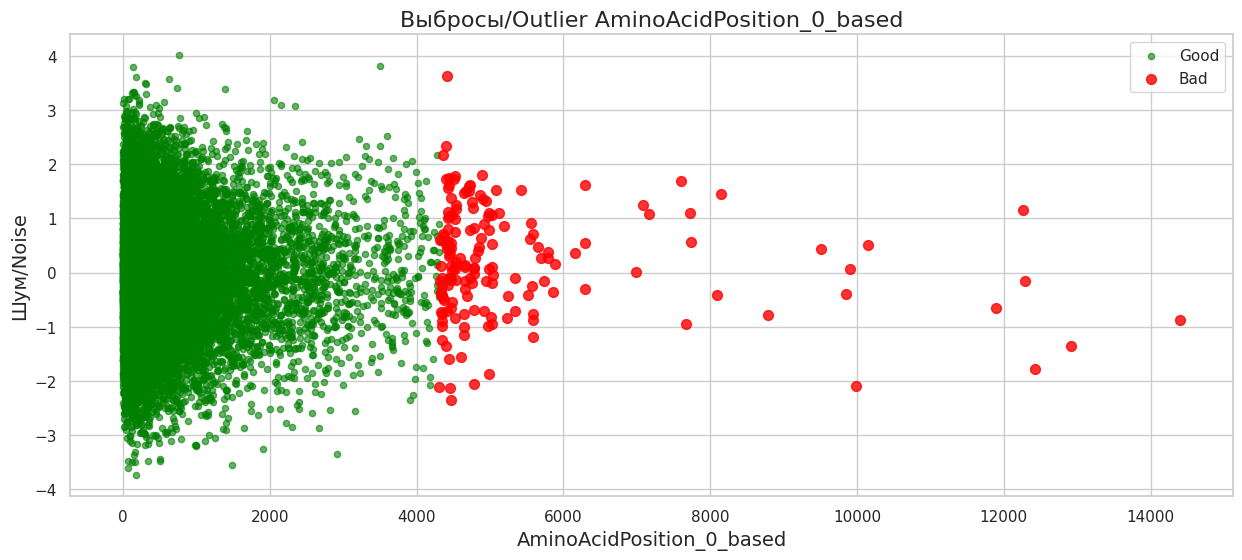

In [21]:
def plot_outliers(data2, feature, threshold=5):
    mean, std = np.mean(data2), np.std(data2)
    z_score = np.abs((data2 - mean) / std)
    good = z_score < threshold

    print(f"Rejection {(~good).sum()} points")

    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    visual_scatter = np.random.normal(size=data2.size)

    plt.scatter(data2[good], visual_scatter[good], s=20, label="Good", color="green", alpha=0.6)
    plt.scatter(data2[~good], visual_scatter[~good], s=50, label="Bad", color="red", alpha=0.8)

    plt.title(f'Выбросы/Outlier {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Шум/Noise', fontsize=14)

    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


for feature in main_features:
    plot_outliers(data[feature], feature)

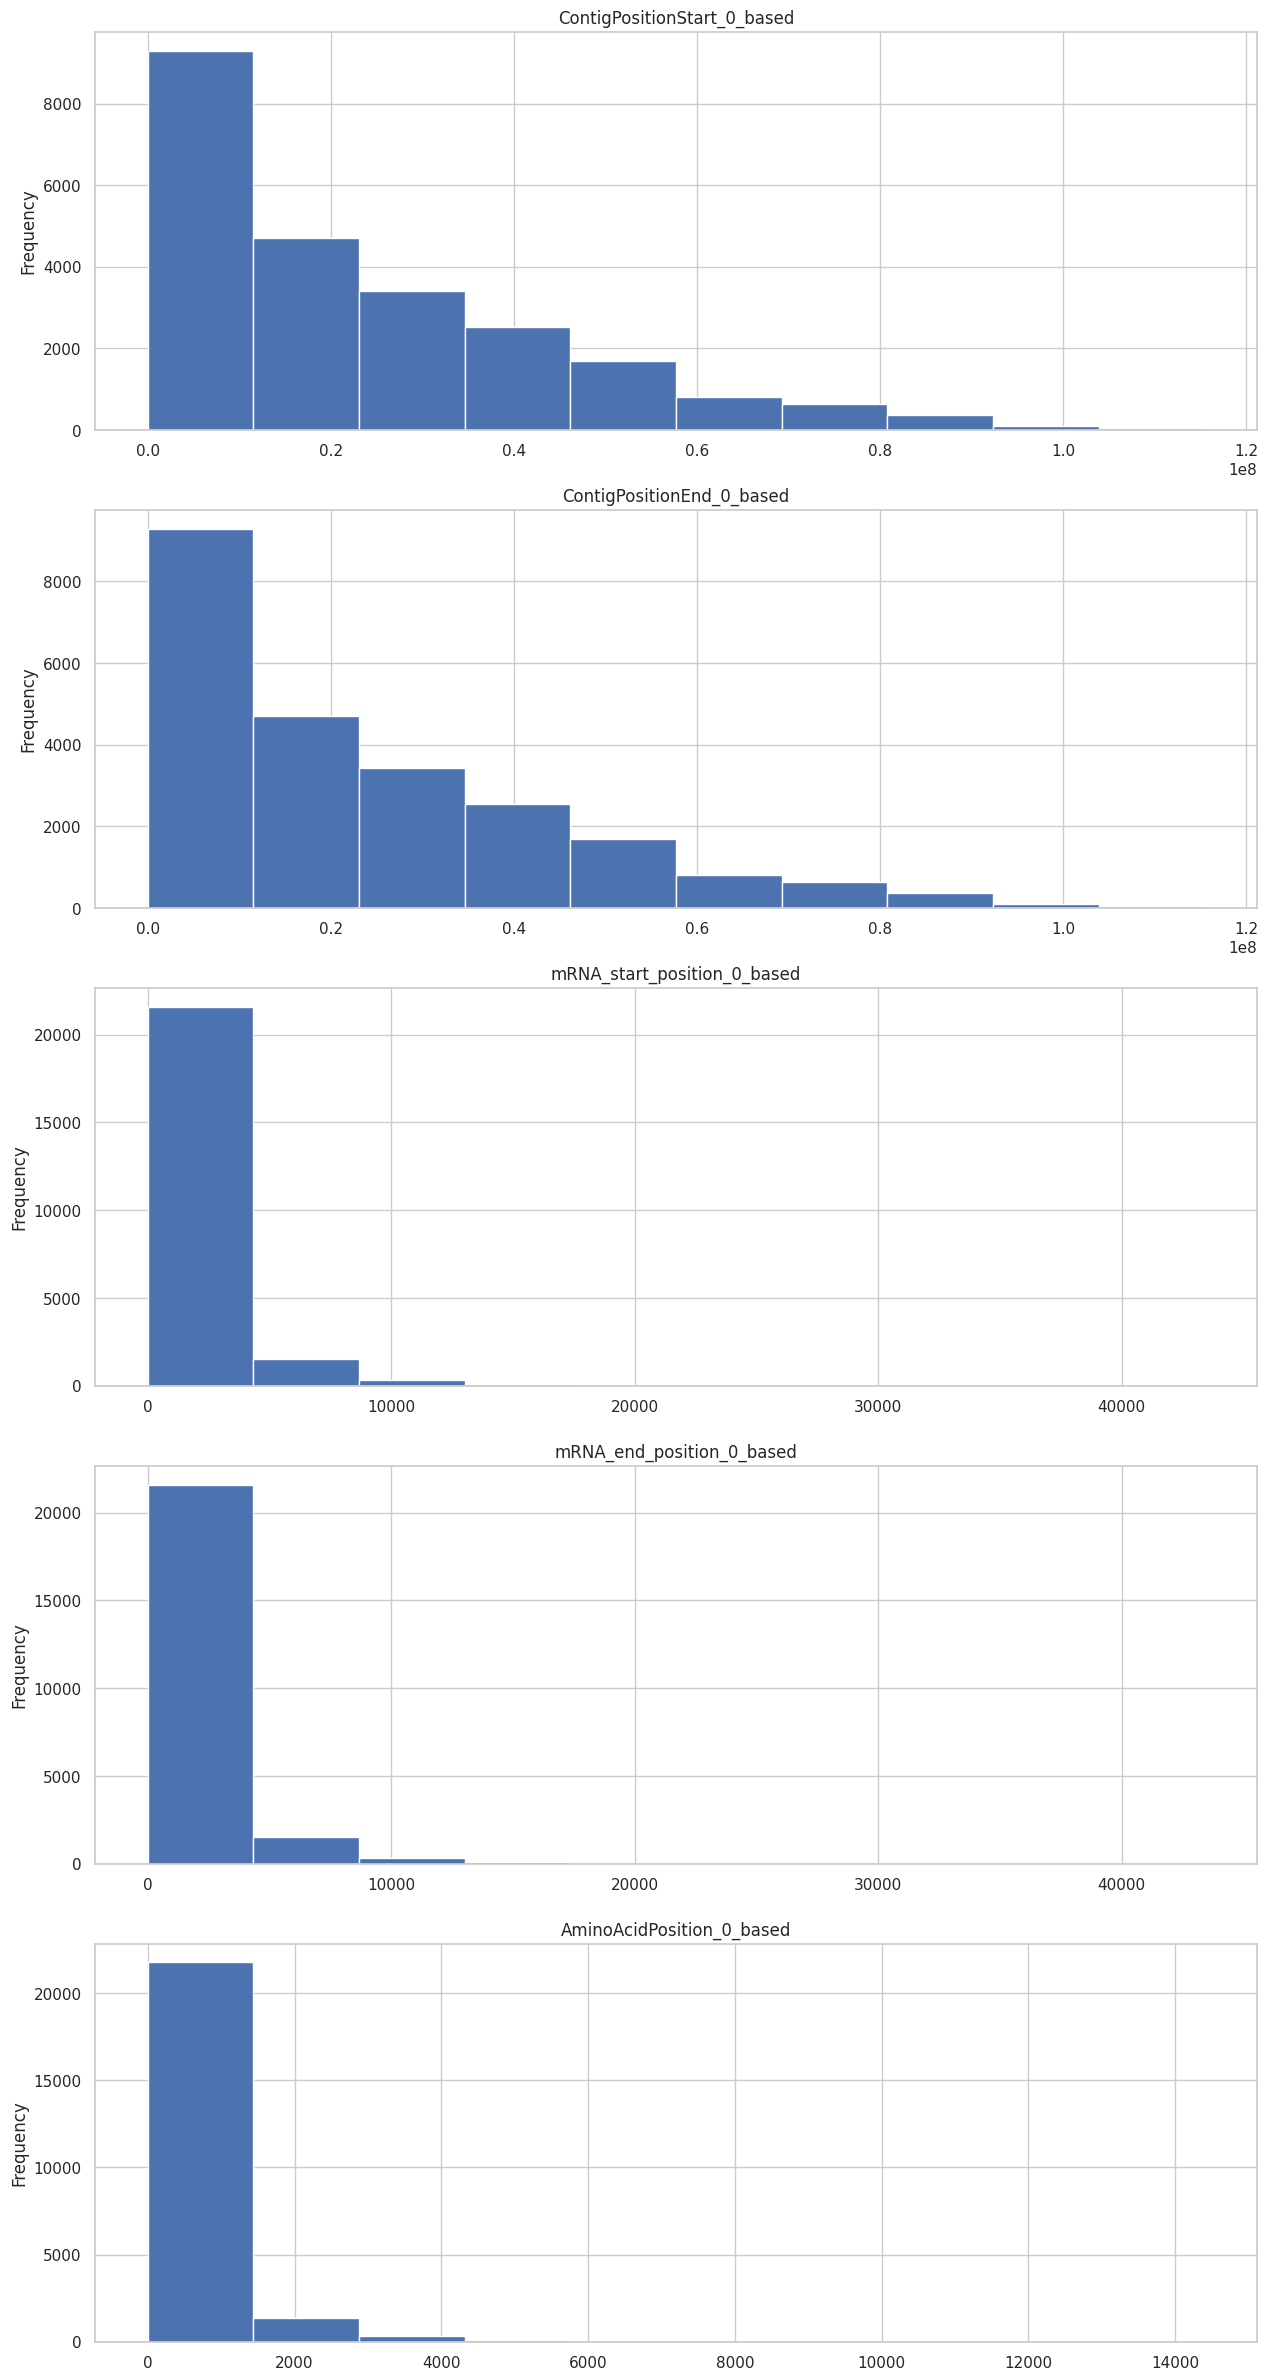

In [22]:
fig, axs = plt.subplots(5, 1, figsize=(15, 30))

# ContigPositionStart_0_based, ContigPositionEnd_0_based, mRNA_start_position_0_based, mRNA_end_position_0_based, AminoAcidPosition_0_based
data['ContigPositionStart_0_based'].plot(kind='hist', ax=axs[0],  title='ContigPositionStart_0_based')
data['ContigPositionEnd_0_based'].plot(kind='hist', ax=axs[1], title='ContigPositionEnd_0_based')
data['mRNA_start_position_0_based'].plot(kind='hist', ax=axs[2], title='mRNA_start_position_0_based')
data['mRNA_end_position_0_based'].plot(kind='hist', ax=axs[3],  title='mRNA_end_position_0_based')
data['AminoAcidPosition_0_based'].plot(kind='hist', ax=axs[4], title='AminoAcidPosition_0_based')

plt.show()

In [23]:
data.describe()

,Rs_id,ContigPositionStart_0_based,ContigPositionEnd_0_based,mRNA_start_position_0_based,mRNA_end_position_0_based,ReadingFrame_base_position_in_codon,AminoAcidPosition_0_based
count,2.361900e+04,2.361900e+04,2.361900e+04,23619.000000,23619.000000,23619.000000,23619.000000
mean,4.465202e+07,2.353663e+07,2.353663e+07,1841.822304,1841.822304,1.651890,545.929167
std,3.109171e+07,2.170686e+07,2.170686e+07,2264.689737,2264.689737,0.663961,752.923830
min,3.340000e+02,2.320000e+03,2.320000e+03,1.000000,1.000000,1.000000,0.000000
25%,1.120586e+07,5.796552e+06,5.796552e+06,616.000000,616.000000,1.000000,141.000000
50%,3.604755e+07,1.754257e+07,1.754257e+07,1151.000000,1151.000000,2.000000,312.000000
75%,7.653633e+07,3.579090e+07,3.579090e+07,2141.500000,2141.500000,2.000000,634.000000
max,8.035583e+07,1.154211e+08,1.154211e+08,43402.000000,43402.000000,3.000000,14399.000000


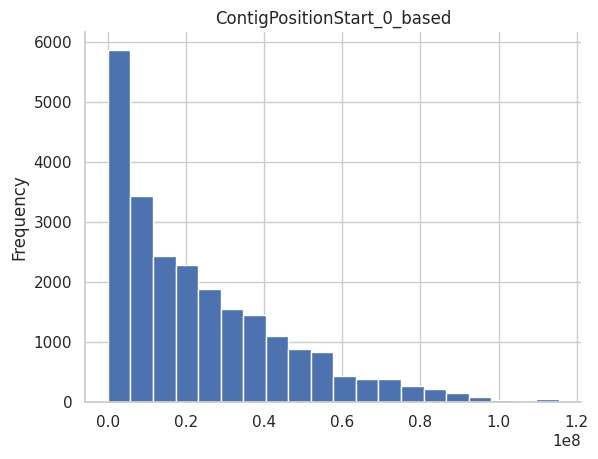

In [24]:
from matplotlib import pyplot as plt
data['ContigPositionStart_0_based'].plot(kind='hist', bins=20, title='ContigPositionStart_0_based')
plt.gca().spines[['top', 'right',]].set_visible(False)

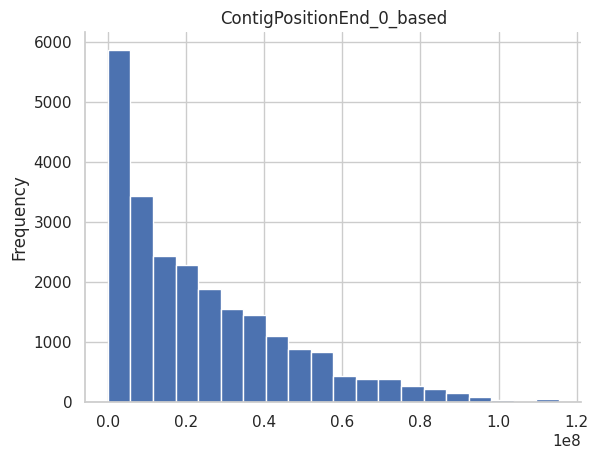

In [25]:
from matplotlib import pyplot as plt
data['ContigPositionEnd_0_based'].plot(kind='hist', bins=20, title='ContigPositionEnd_0_based')
plt.gca().spines[['top', 'right',]].set_visible(False)

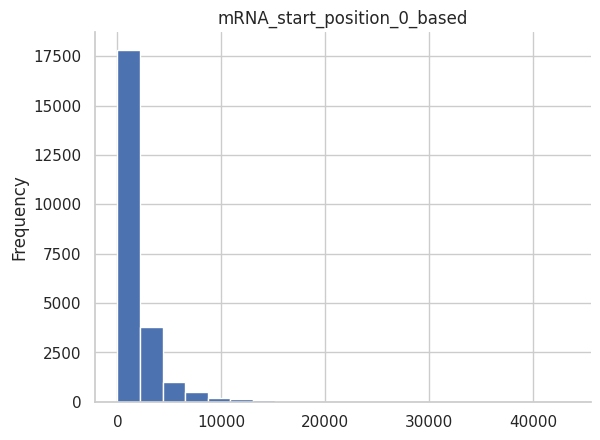

In [26]:
from matplotlib import pyplot as plt
data['mRNA_start_position_0_based'].plot(kind='hist', bins=20, title='mRNA_start_position_0_based')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Корреляционный анализ

<ipython-input-27-339045639f79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean = data.drop(columns_to_drop, axis=1, inplace=True)


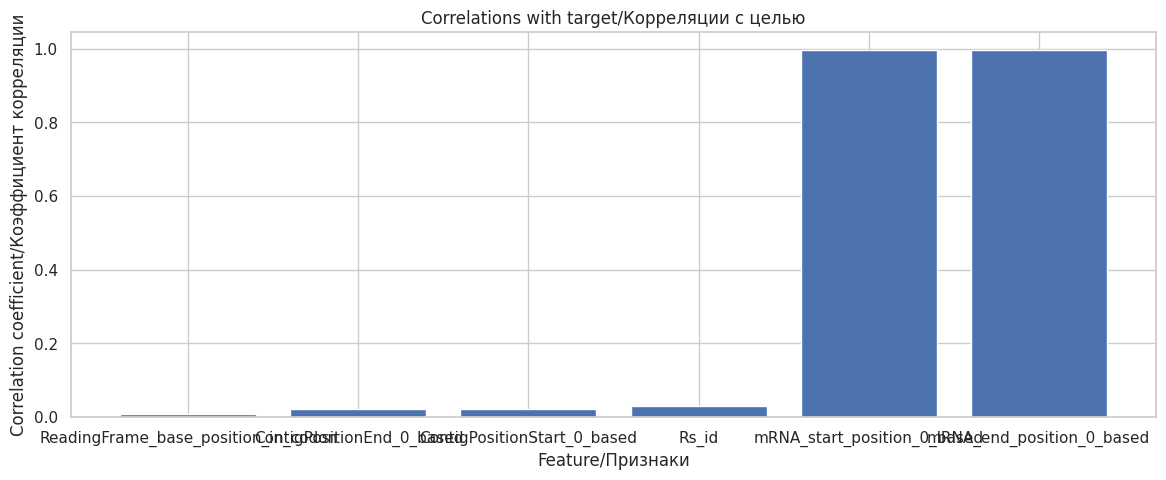

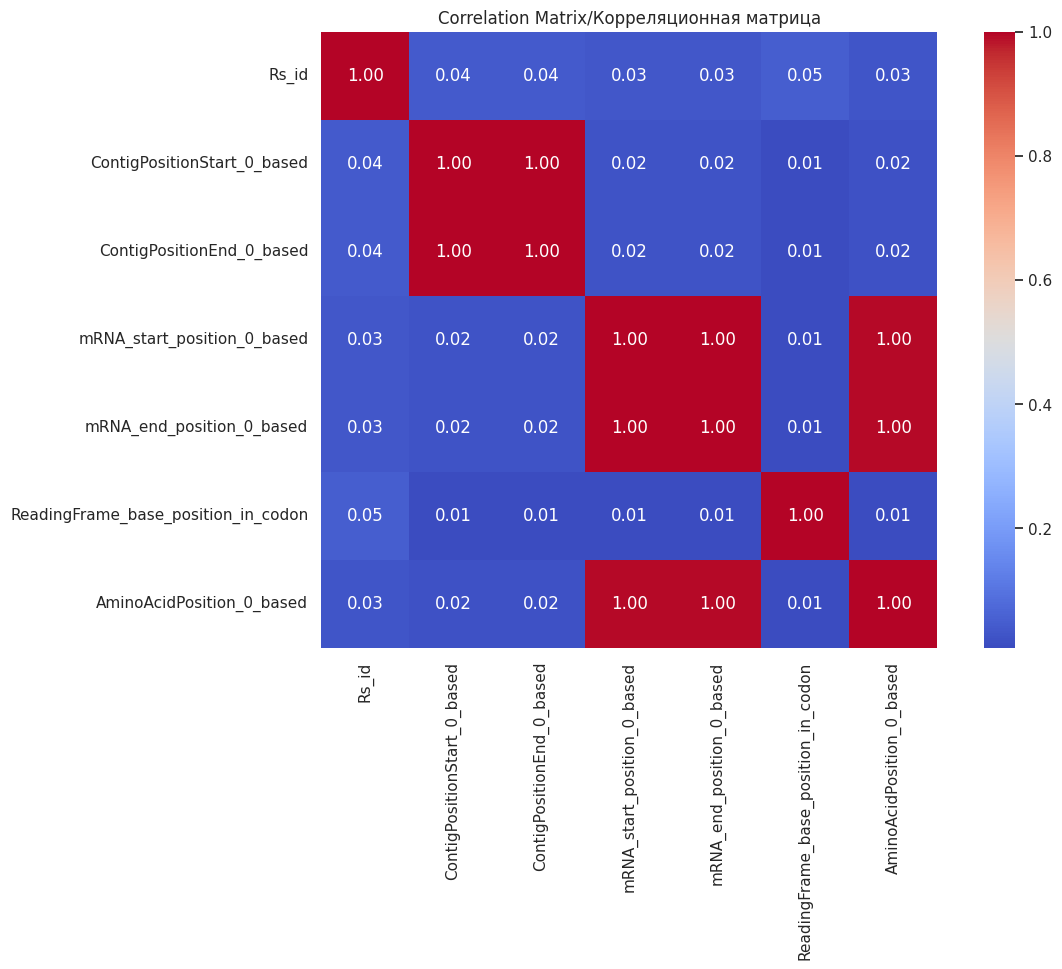

In [27]:
columns_to_drop = categorical_features

df_clean = data.drop(columns_to_drop, axis=1, inplace=True)

corr_with_target = data.corr()['AminoAcidPosition_0_based'].abs().sort_values()

corr_with_target = corr_with_target.drop('AminoAcidPosition_0_based')

#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target/Корреляции с целью')
ax.set_xlabel('Feature/Признаки')
ax.set_ylabel('Сorrelation coefficient/Коэффициент корреляции');

correlation_matrix = data.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix/Корреляционная матрица')
plt.show()